In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import klib
%matplotlib inline

src = 'dataScienceTask/T_meds.csv'
dest = 'saved_plots/demo/'

In [2]:
# read csv
df_meds = pd.read_csv(src)
df_meds.head()

,id,drug,daily_dosage,start_day,end_day
0,0,atorvastatin,10.0,19,109
1,0,atorvastatin,10.0,117,207
2,0,losartan,100.0,19,289
3,0,losartan,100.0,403,493
4,0,losartan,100.0,587,677


In [3]:
# read csv
df_stage = pd.read_csv('dataScienceTask/T_stage.csv')
df_stage.head()

,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True


In [5]:
#df_res = pd.merge(df_meds, df_stage, on="id", how="left")
#df_res.head()

# 1) Exploration

In [6]:
print(f"Num of patients with meds: {len(df_meds['id'].unique())}")
print(f"Types of drugs: {len(df_meds['drug'].unique())}")
print(f"Types of daily dosages: {len(df_meds['daily_dosage'].unique())}")
print(f"Max end day of medication: {df_meds['end_day'].max()}")

Num of patients with meds: 272
Types of drugs: 21
Types of daily dosages: 26
Max end day of medication: 698


### 1a) Number of drugs used

In [7]:
d = df_meds.groupby(['id']).nunique()
d.head()

,drug,daily_dosage,start_day,end_day
id,,,,
0,3,3,9,10
1,1,2,4,4
2,1,1,2,2
3,1,1,4,4
4,3,3,13,13


Text(0.5, 1.0, 'Number of patients who require 1 or more drugs')

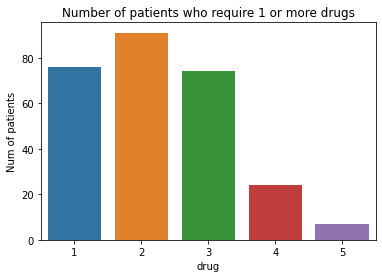

In [8]:
# Most number of drugs used
ax = sns.countplot(x="drug", data=df_meds.groupby(['id']).nunique())
ax.set_ylabel("Num of patients")
ax.set_title("Number of patients who require 1 or more drugs")
# ax.tick_params(axis='x', rotation=90)

In [9]:
df_res = pd.merge(df_meds, df_stage, on="id", how="left")
pd.merge(df_res.groupby(['id']).nunique(), df_stage, on="id", how="left").head()

,id,drug,daily_dosage,start_day,end_day,Stage_Progress_x,Stage_Progress_y
0,0,3,3,9,10,1,True
1,1,1,2,4,4,1,False
2,2,1,1,2,2,1,True
3,3,1,1,4,4,1,False
4,4,3,3,13,13,1,True


Text(0.5, 1.0, 'Number of patients who require 1 or more drugs')

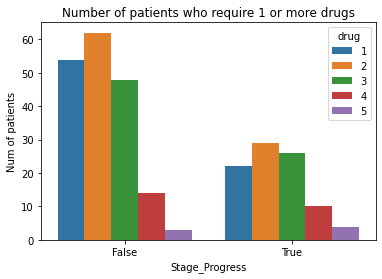

In [10]:
# Number of drugs used for each target label
ax = sns.countplot(x="Stage_Progress", hue="drug", data=pd.merge(df_meds.groupby(['id']).nunique(), df_stage, on="id", how="left"))
ax.set_ylabel("Num of patients")
ax.set_title("Number of patients who require 1 or more drugs")
# ax.tick_params(axis='x', rotation=90)

### 1b) Type of drug used

In [11]:
#d=df_meds.groupby(['drug'], as_index=False).nunique()
d = df_meds.groupby(['id','drug'], as_index=False).nunique()
d.head()

,id,drug,daily_dosage,start_day,end_day
0,0,atorvastatin,1,2,2
1,0,losartan,1,3,3
2,0,metformin,1,6,6
3,1,atorvastatin,2,4,4
4,2,rosuvastatin,1,2,2


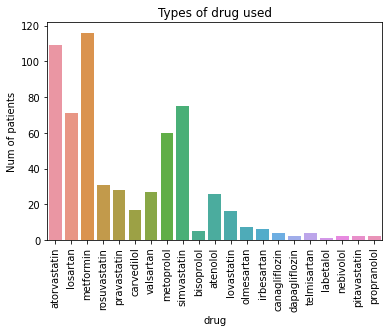

In [12]:
# Most frequent drug used
ax = sns.countplot(x="drug", data=df_meds.groupby(['id','drug'], as_index=False).nunique())
ax.set_title("Types of drug used")
ax.set_ylabel("Num of patients")
ax.tick_params(axis='x', rotation=90)

In [13]:
df_meds.groupby(['id','drug'], as_index=False).count()

,id,drug,daily_dosage,start_day,end_day
0,0,atorvastatin,2,2,2
1,0,losartan,3,3,3
2,0,metformin,6,6,6
3,1,atorvastatin,4,4,4
4,2,rosuvastatin,2,2,2
...,...,...,...,...,...
606,297,valsartan,6,6,6
607,298,atorvastatin,2,2,2
608,298,metformin,2,2,2
609,299,atorvastatin,4,4,4


In [14]:
pd.merge(df_meds.groupby(['id','drug'], as_index=False).nunique(), df_stage, on="id", how="left").head()

,id,drug,daily_dosage,start_day,end_day,Stage_Progress
0,0,atorvastatin,1,2,2,True
1,0,losartan,1,3,3,True
2,0,metformin,1,6,6,True
3,1,atorvastatin,2,4,4,False
4,2,rosuvastatin,1,2,2,True


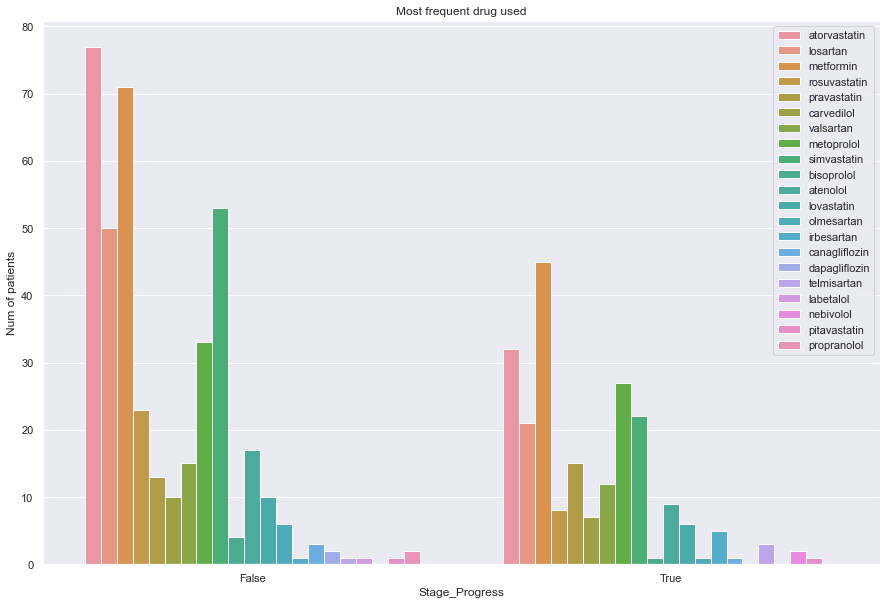

In [19]:
# Type of drug used in each target label
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Stage_Progress", 
                   hue="drug", 
                   data=pd.merge(df_meds.groupby(['id','drug'], as_index=False).nunique(), df_stage, on="id", how="left"))
ax.set_title("Most frequent drug used")
ax.set_ylabel("Num of patients")
#ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
sns.set(font_scale=1)

### 1c) Daily dosage

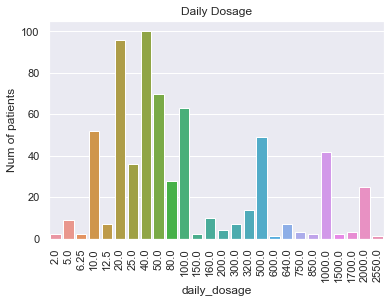

In [16]:
# distribution of drug dosage
ax = sns.countplot(x="daily_dosage", data=df_meds.groupby(['id','daily_dosage'], as_index=False).nunique())
ax.set_title("Daily Dosage")
ax.set_ylabel("Num of patients")
ax.tick_params(axis='x', rotation=90)

In [17]:
pd.merge(df_meds.groupby(['id','daily_dosage'], as_index=False).nunique(), df_stage, on="id", how="left").head()

,id,daily_dosage,drug,start_day,end_day,Stage_Progress
0,0,10.0,1,2,2,True
1,0,100.0,1,3,3,True
2,0,1000.0,1,6,6,True
3,1,20.0,1,2,2,False
4,1,40.0,1,2,2,False


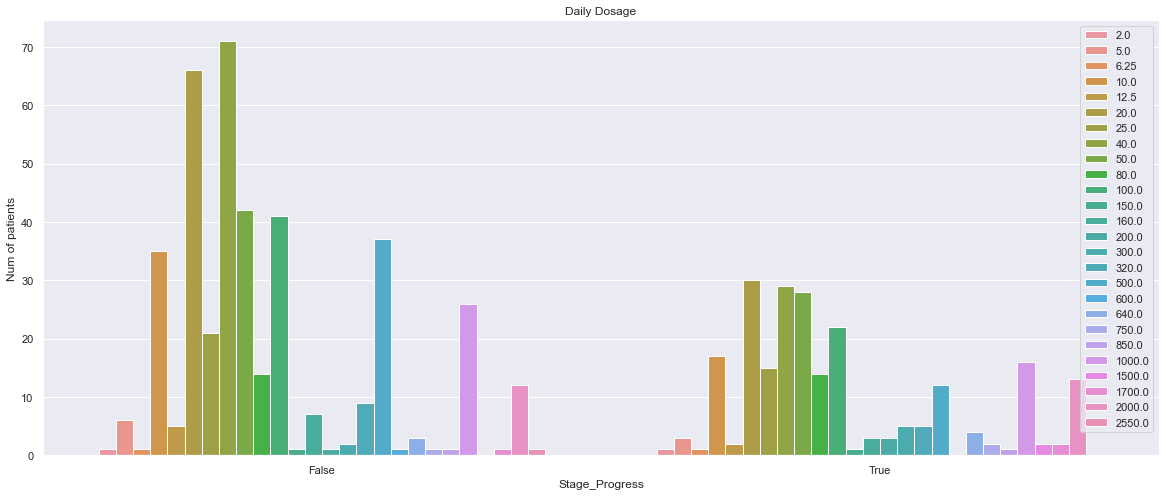

In [18]:
# distribution of drug dosage in each target label
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Stage_Progress", 
                   hue="daily_dosage", 
                   data=pd.merge(df_meds.groupby(['id','daily_dosage'], as_index=False).nunique(), df_stage, on="id", how="left"))
ax.set_title("Daily Dosage")
ax.set_ylabel("Num of patients")
# ax.tick_params(axis='x', rotation=90)
plt.legend(loc='upper right')
sns.set(font_scale=1)

### 1d) Correlation btw number of drugs and age

In [20]:
# number of drugs & age
df_demo = pd.read_csv('dataScienceTask/new_df.csv')
df_num_unique = df_meds.groupby(['id']).nunique().copy()
df_merge = pd.merge(df_demo, df_num_unique, on="id", how="left").copy() # use merge and not concat as T_meds have missing ids that do not take medicine
df_num_drug_age = df_merge[['age','drug']].copy()
df_num_drug_age.rename(columns = {'drug':'num_drug'}, inplace = True)
df_num_drug_age.head()

,age,num_drug
0,70,3.0
1,71,1.0
2,57,1.0
3,74,1.0
4,50,3.0


<AxesSubplot:>

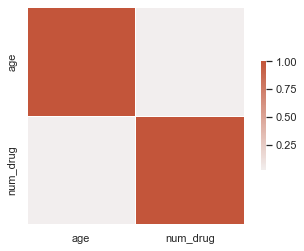

In [21]:
corr=df_num_drug_age.corr()
# Draw the heatmap with the mask and correct aspect ratio
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Weak correlation means it does not necessarily mean aging results in increase in number of drug intakes.
Corerlation is to be further examined with health data later.

### 2) Transform to 1D signal for daily dosage

In [4]:
df_meds.head()

,id,drug,daily_dosage,start_day,end_day
0,0,atorvastatin,10.0,19,109
1,0,atorvastatin,10.0,117,207
2,0,losartan,100.0,19,289
3,0,losartan,100.0,403,493
4,0,losartan,100.0,587,677


In [5]:
# find the max end day --> all 1D signals will end with max_end_day (ensure all signals are of equal length)
max_end_day = df_meds['end_day'].max()
print(f"max end day: {max_end_day}")
# total num of days = 698+1 = 699

max end day: 698


In [6]:
# combining rows of same id by aggregating in a list
df_agg = df_meds.groupby(['id','drug'], as_index=False)[['daily_dosage','start_day','end_day']].agg(list)
df_aggnew = df_agg.groupby(['id'], as_index=False)[['drug','daily_dosage','start_day','end_day']].agg(list)
df_aggnew.head()

,id,drug,daily_dosage,start_day,end_day
0,0,"[atorvastatin, losartan, metformin]","[[10.0, 10.0], [100.0, 100.0, 100.0], [1000.0,...","[[19, 117], [19, 403, 587], [19, 131, 309, 312...","[[109, 207], [289, 493, 677], [109, 281, 399, ..."
1,1,[atorvastatin],"[[20.0, 20.0, 40.0, 40.0]]","[[43, 96, 295, 394]]","[[133, 126, 385, 484]]"
2,2,[rosuvastatin],"[[10.0, 10.0]]","[[213, 577]]","[[303, 667]]"
3,3,[atorvastatin],"[[10.0, 10.0, 10.0, 10.0]]","[[187, 334, 481, 560]]","[[277, 424, 571, 650]]"
4,4,"[losartan, metformin, pravastatin]","[[100.0, 100.0, 100.0, 100.0], [850.0, 850.0, ...","[[19, 22, 270, 394], [31, 157, 351, 448, 457, ...","[[109, 112, 360, 484], [121, 247, 441, 538, 54..."


In [7]:
df_aggnew.tail()

,id,drug,daily_dosage,start_day,end_day
267,294,"[atenolol, atorvastatin, losartan]","[[25.0, 25.0, 25.0], [40.0, 40.0, 40.0, 40.0],...","[[10, 261, 402], [10, 52, 405, 580], [10, 192,...","[[100, 351, 492], [100, 142, 495, 670], [100, ..."
268,296,"[atorvastatin, metformin]","[[40.0, 40.0], [2000.0, 2000.0, 2000.0]]","[[262, 599], [0, 392, 522]]","[[352, 689], [30, 422, 552]]"
269,297,"[irbesartan, metformin, metoprolol, pitavastat...","[[300.0], [1000.0], [100.0, 50.0, 100.0], [2.0...","[[11], [11], [228, 315, 315], [691], [7, 11, 8...","[[101], [71], [318, 405, 405], [694], [97, 56,..."
270,298,"[atorvastatin, metformin]","[[20.0, 20.0], [1000.0, 1000.0]]","[[309, 329], [309, 557]]","[[399, 419], [399, 647]]"
271,299,"[atorvastatin, losartan]","[[10.0, 10.0, 10.0, 10.0], [100.0, 100.0, 100....","[[117, 507, 529, 578], [131, 143, 144, 461, 49...","[[147, 537, 559, 608], [161, 173, 174, 491, 52..."


In [9]:
# Remove drug if no. of patients is less than 10% of the sample size.
df_temp_1 = df_meds.groupby(['id','drug'], as_index=False).nunique()
drug_freq_series = df_temp_1['drug'].value_counts()
drug_freq_df = pd.DataFrame(drug_freq_series)
drug_freq_df = drug_freq_df[drug_freq_df['drug'] > 30] # only include if more than 10% of sample size
red_drug_list = drug_freq_df['drug'].keys().tolist()
red_drug_list

['metformin',
 'atorvastatin',
 'simvastatin',
 'losartan',
 'metoprolol',
 'rosuvastatin']

In [11]:
def generate_all_waves(df_aggnew, red_drug_list, max_end_day, max_patient_id = 299):
    """
    To generate 1D wave of dosage intake over 700 days for all selected drugs
    -generates waves with 0s when drug is absent
    -includes patients who do not take drugs
    
    Input:
        1) df_aggnew: Dataframe
            Modified datatframe containing lists of lists regarding drug type, dosage levels for 
            each drug type and the corresponding start and end days.
        2) red_drug_list: List
            List of drugs with frequency more thab 10% of sample size.
        3) max_end_day: int
            Maximum end of day for dosage taken (have to be less than 700).
        4) max_patient_id: int
            Maximum value of patient id.
    Output:
        out: List
            List of lists containing patient id, drug name and the 1D wave.
            Format: [patient_id, drug name, 1D wave]
    """
    out = []
    df_aggnew_np = df_aggnew.to_numpy()
    count = 0 # tracker to track absence of patients not taking drugs
    
    for i in range(max_patient_id+1): # for each patient id
            
        if i == df_aggnew_np[count][0]: # if incremental patient id matches the current index of patrient id -> patient takes meds
            for drug in red_drug_list: # should only include selected drugs
                collect = []
                collect.append(i)# collect patient id
                collect.append(drug) # collect the drug
                wave = [0]*(max_end_day+1) # init wave with all zeros
                dosage_list = df_aggnew_np[count][2]
                start_day_list = df_aggnew_np[count][3]
                end_day_list = df_aggnew_np[count][4]

                if drug in df_aggnew_np[count][1]: # if drug is taken by current patient_id
                    ix_drug = df_aggnew_np[count][1].index(drug)

                    for n in range(len(dosage_list[ix_drug])): # for each dosage level
                        for ix in range(start_day_list[ix_drug][n]+1, end_day_list[ix_drug][n]+2): 
                            wave[ix] = dosage_list[ix_drug][n]
                            
                    collect.extend(wave) # collect wave for current drug
                else:
                    collect.extend(wave) # collect wave for current drug
                out.append(collect) # collect for each drug in list
            count+=1 # only increment count tracker if drug is taken by current patient_id
                
        else: # if patient does not take meds
            for drug in red_drug_list: # should only include selected drugs
                collect = []
                collect.append(i)# collect patient id
                collect.append(drug) # collect the drug
                wave = [0]*(max_end_day+1) # init wave with all zeros
                collect.extend(wave) # collect wave for current drug
                out.append(collect) # collect for each drug in list
            
    return out
                


In [10]:
from utils import generate_all_waves
out = generate_all_waves(df_aggnew, red_drug_list, max_end_day=699, max_patient_id = 299)
print(len(out))
print(len(out[0]))

1800
702


Patient: 0
Drug: losartan


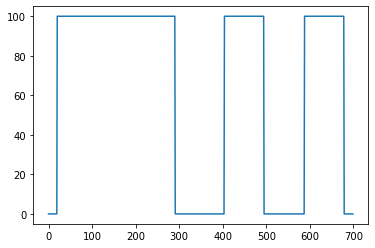

In [11]:
# Sample
p=3
print(f"Patient: {out[p][0]}")
print(f"Drug: {out[p][1]}")
plt.plot(np.arange(700),out[p][2:])
# plt.set_title("Daily Dosage")
# plt.set_ylabel("Num of patients")
# days start from 0

Patient: 0
Drug: atorvastatin


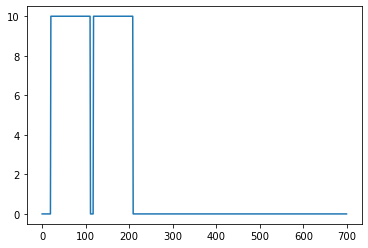

In [12]:
# Sample
print(f"Patient: {out[1][0]}")
print(f"Drug: {out[1][1]}")
plt.plot(np.arange(700),out[1][2:])
# plt.set_title("Daily Dosage")
# plt.set_ylabel("Num of patients")

Patient: 49
Drug: rosuvastatin


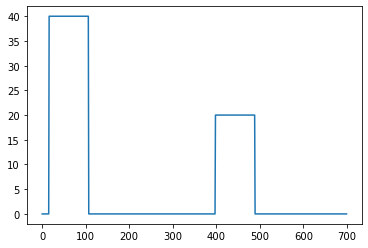

In [13]:
# Sample
i=299
print(f"Patient: {out[i][0]}")
print(f"Drug: {out[i][1]}")
plt.plot(np.arange(700),out[i][2:])
# plt.set_title("Daily Dosage")
# plt.set_ylabel("Num of patients")

Patient: 299
Drug: atorvastatin


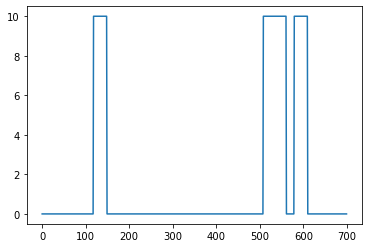

In [14]:
# Sample
i=1795
print(f"Patient: {out[i][0]}")
print(f"Drug: {out[i][1]}")
plt.plot(np.arange(700),out[i][2:])
# plt.set_title("Daily Dosage")
# plt.set_ylabel("Num of patients")

In [26]:
#df_out = pd.DataFrame(out)
#df_out.to_csv('waves_meds.csv')

import csv
with open('waves_meds.csv', "w") as file:
    writer = csv.writer(file)
    writer.writerows(out)
file.close()

In [27]:
data=pd.read_csv('waves_meds.csv')
data.shape

(1799, 702)

### Healthy Patients Missing!

In [17]:
# Find healthy patients missing from this dataframe
patients_meds_set = set()
patients_meds_set.update(df_meds['id'].unique())

patients_all = set(np.arange(0,300))

patients_no_meds_set = patients_all.difference(patients_meds_set)

print(f"Total num of patients: {len(patients_all)}")
print(f"Num of patients with meds: {len(patients_meds_set)}")
print(f"Num of patients with no meds: {len(patients_no_meds_set)}")

Total num of patients: 300
Num of patients with meds: 272
Num of patients with no meds: 28
